In [8]:
#impor libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from welly import Location
from welly import Well

In [9]:
#connect Google Colab with Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#load data and read Las file
data = Well.from_las('/content/drive/My Drive/Dataset/L05-15-Spliced.las')

In [11]:
data

Well(uwi: '', name: 'L5-15', 26 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'DEPTH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

1. crs: coordinate reference system used for the location
2. location: latitude and longitude coordinates of the well
3. province: the name of the province where the well is located
3. ekb: elevation of the kelly bushing
4. egl: elevation of the ground level
5. td: total depth of the well

In [12]:
data.data

{'BHT': Curve(mnemonic=BHT, units=DEGC, start=2772.7500, stop=2907.6250, step=0.1250, count=[931]),
 'CAL': Curve(mnemonic=CAL, units=IN, start=2772.7500, stop=2907.6250, step=0.1250, count=[918]),
 'CHT': Curve(mnemonic=CHT, units=LBF, start=2772.7500, stop=2907.6250, step=0.1250, count=[925]),
 'CN': Curve(mnemonic=CN, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[921]),
 'CNC': Curve(mnemonic=CNC, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[894]),
 'CNCQH': Curve(mnemonic=CNCQH, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[898]),
 'CNQH': Curve(mnemonic=CNQH, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[926]),
 'DEPTH': Curve(mnemonic=DEPTH, units=M, start=2772.7500, stop=2907.6250, step=0.1250, count=[931]),
 'GR': Curve(mnemonic=GR, units=GAPI, start=2772.7500, stop=2907.6250, step=0.1250, count=[923]),
 'MBVI': Curve(mnemonic=MBVI, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[864]),
 'MBVM':

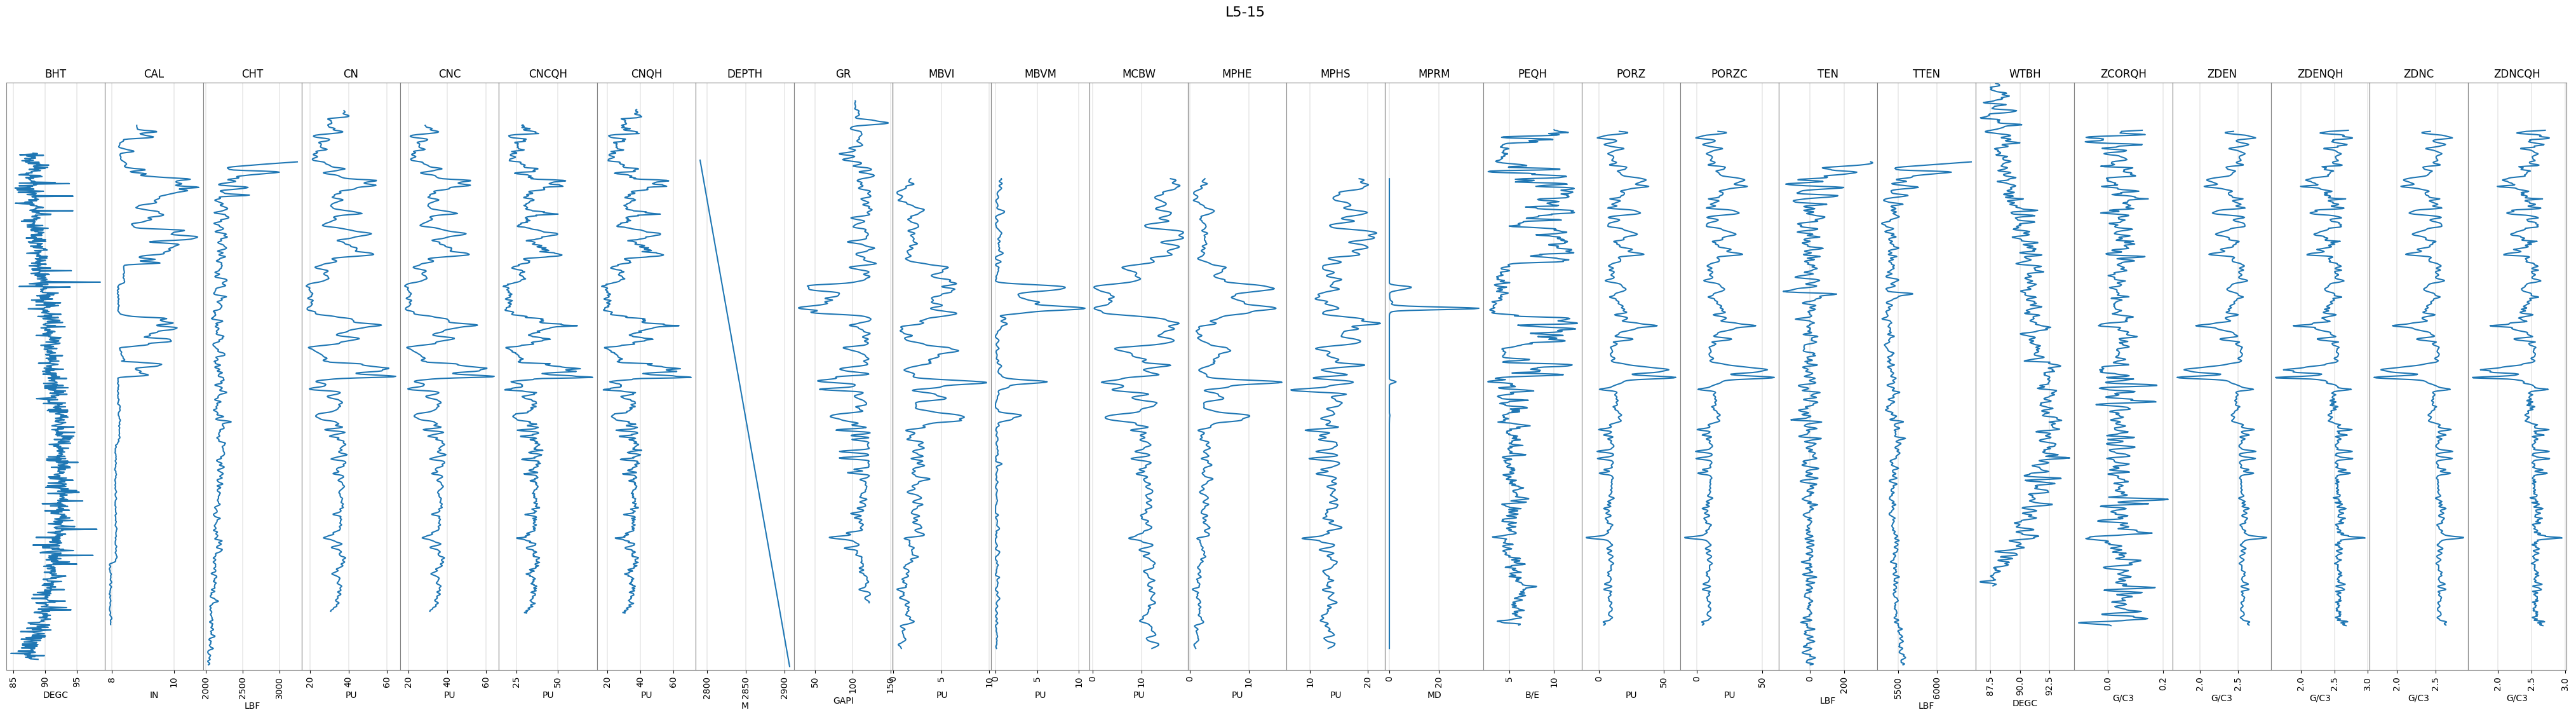

In [13]:
data.plot(extents='curves')

In [14]:
survey =  pd.read_csv('/content/drive/My Drive/Dataset/L05-15-Survey.csv')

In [15]:
survey

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.00,0.00,0.00,0.00,0.00,0.00
1,89.30,0.00,0.00,89.30,0.00,0.00
2,142.10,2.31,323.48,142.09,-0.63,0.86
3,170.20,3.89,319.12,170.14,-1.59,2.03
4,197.90,5.86,315.60,197.74,-3.20,3.75
...,...,...,...,...,...,...
107,3121.82,22.52,202.44,3013.36,-271.20,-620.33
108,3149.93,23.35,203.30,3039.24,-275.46,-630.42
109,3178.92,23.82,204.05,3065.81,-280.12,-641.04
110,3192.32,24.12,204.96,3078.06,-282.38,-646.00


In [16]:
#The survey data is then subsetted to include only the MD, INC, and AZI columns, which are required by welly to calculate True Vertical Depth (TVD), X-offset, and Y-offset.
survey_subset = survey[['MD', 'INC', 'AZI']]

In [17]:
survey_subset

,MD,INC,AZI
0,0.00,0.00,0.00
1,89.30,0.00,0.00
2,142.10,2.31,323.48
3,170.20,3.89,319.12
4,197.90,5.86,315.60
...,...,...,...
107,3121.82,22.52,202.44
108,3149.93,23.35,203.30
109,3178.92,23.82,204.05
110,3192.32,24.12,204.96


In [18]:
survey_subset.values

array([[0.00000e+00, 0.00000e+00, 0.00000e+00],
       [8.93000e+01, 0.00000e+00, 0.00000e+00],
       [1.42100e+02, 2.31000e+00, 3.23480e+02],
       [1.70200e+02, 3.89000e+00, 3.19120e+02],
       [1.97900e+02, 5.86000e+00, 3.15600e+02],
       [2.26000e+02, 6.13000e+00, 3.12610e+02],
       [2.54600e+02, 3.83000e+00, 3.10670e+02],
       [2.83300e+02, 2.05000e+00, 3.04740e+02],
       [3.11800e+02, 9.90000e-01, 2.93310e+02],
       [3.40300e+02, 3.70000e-01, 2.67420e+02],
       [3.68900e+02, 1.80000e-01, 2.32270e+02],
       [3.97400e+02, 2.00000e-01, 2.35440e+02],
       [4.26100e+02, 4.80000e-01, 2.18070e+02],
       [4.54700e+02, 4.20000e-01, 2.34410e+02],
       [4.82900e+02, 4.30000e-01, 2.35030e+02],
       [5.11600e+02, 6.60000e-01, 2.28270e+02],
       [5.40200e+02, 1.00000e+00, 2.46670e+02],
       [5.68700e+02, 1.27000e+00, 2.36360e+02],
       [5.97500e+02, 1.66000e+00, 2.28660e+02],
       [6.26400e+02, 2.07000e+00, 2.34090e+02],
       [6.54900e+02, 2.65000e+00, 2.1612

In [19]:
#Add deviation data to a well
data.location.add_deviation(survey_subset.values)

In [51]:
data

Well(uwi: '', name: 'L5-15', 26 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'DEPTH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

In [20]:
#View first five rows of the data
data.location.position[:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

In [21]:
x_loc = data.location.position[:,0]
y_loc = data.location.position[:,1]
z_loc = data.location.position[:,2]

In [22]:
x_loc

array([   0.        ,    0.        ,   -0.6333253 ,   -1.59422229,
         -3.19869524,   -5.30656356,   -7.155155  ,   -8.3040907 ,
         -8.94910573,   -9.26715174,   -9.39493415,   -9.47130499,
         -9.58668527,   -9.74579839,   -9.91656199,  -10.12817189,
        -10.48026718,  -10.97157541,  -11.5504836 ,  -12.2875089 ,
        -13.0927907 ,  -13.90565392,  -14.76653041,  -15.52906858,
        -16.07286745,  -16.65921445,  -17.38151134,  -18.20402288,
        -19.08978325,  -20.11776306,  -21.42000687,  -22.97838334,
        -24.60485311,  -26.254284  ,  -28.0102891 ,  -29.9325156 ,
        -31.85520534,  -33.67446514,  -35.48098674,  -37.37659924,
        -39.40344989,  -41.48516598,  -43.74042386,  -46.40842355,
        -49.57621537,  -53.13702874,  -56.89958753,  -60.52489348,
        -63.75884761,  -66.6534056 ,  -69.55167609,  -72.46689405,
        -75.26294737,  -77.99675197,  -80.66777739,  -83.27710105,
        -85.58242163,  -87.63037261,  -89.77381978,  -91.99932

In [23]:
y_loc

array([ 0.00000000e+00,  0.00000000e+00,  8.55265496e-01,  2.03112298e+00,
        3.75201703e+00,  5.79264781e+00,  7.44916852e+00,  8.36643655e+00,
        8.75435536e+00,  8.84764090e+00,  8.81599274e+00,  8.76038062e+00,
        8.63732367e+00,  8.48200635e+00,  8.36120476e+00,  8.18945483e+00,
        7.98097632e+00,  7.70752096e+00,  7.25517776e+00,  6.67255756e+00,
        5.83844626e+00,  4.56857199e+00,  2.98044703e+00,  1.25810167e+00,
       -4.61124932e-01, -2.53187794e+00, -4.85785329e+00, -7.43883886e+00,
       -1.00136095e+01, -1.24922915e+01, -1.50758260e+01, -1.78154082e+01,
       -2.06903854e+01, -2.37016623e+01, -2.68545958e+01, -3.03566758e+01,
       -3.44171461e+01, -3.89947070e+01, -4.39498737e+01, -4.92338751e+01,
       -5.48226109e+01, -6.06211640e+01, -6.65859084e+01, -7.27890214e+01,
       -7.94059707e+01, -8.65569279e+01, -9.45122987e+01, -1.03247979e+02,
       -1.12328562e+02, -1.21385661e+02, -1.30649460e+02, -1.39994008e+02,
       -1.49290300e+02, -

In [24]:
z_loc

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

In [25]:
data.location.tvd

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

# Creating Location Plots


<ipython-input-52-b1b3121e216d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


Text(0.5, 1.0, 'Y Location vs TVD')

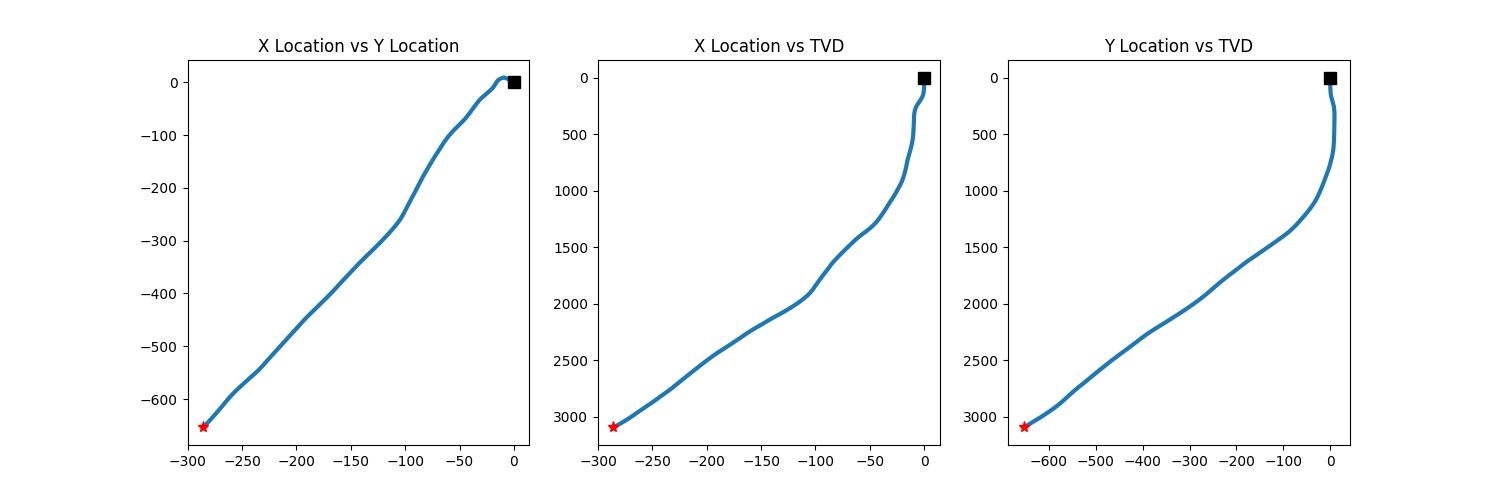

In [52]:
#To understand the position of the well, we can call upon three plots:
#1-The first plots the x and y offset and gives us a top down view / map view of the well path.
#2-The next two plots show us how the well changes in the x location versus TVD and the y location versus TVD.


fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('Y Location vs TVD')

<ipython-input-53-b460d479c040>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


Text(0.5, 1.0, 'X Location vs TVD')

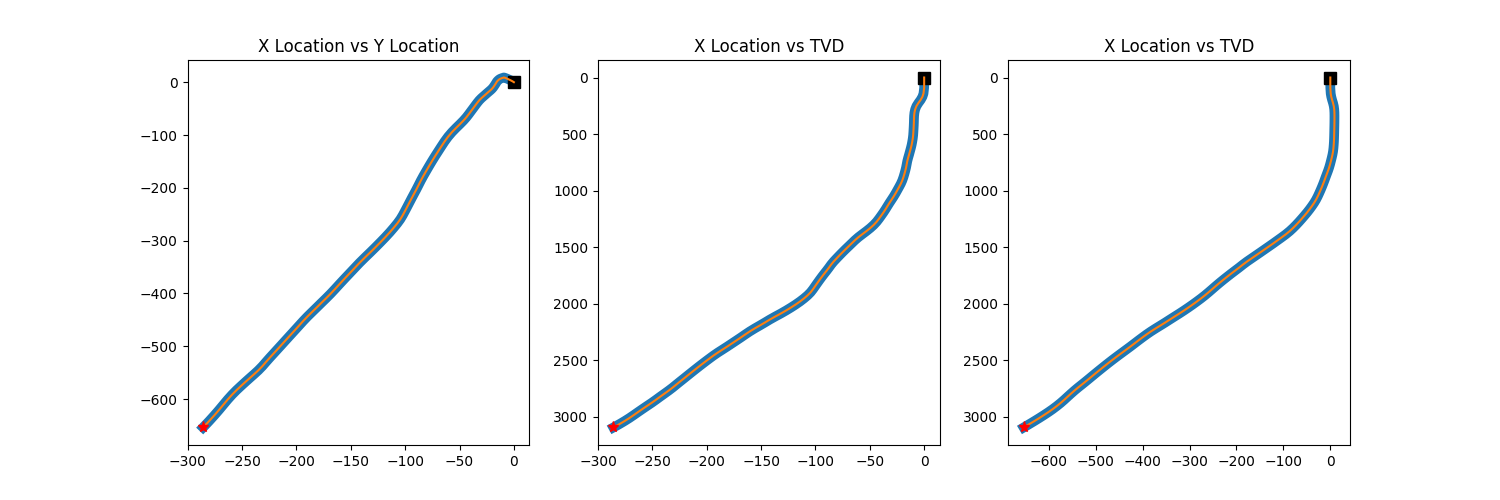

In [53]:
#Compare Against Original Survey

fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=7)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(survey['X-offset'], survey['Y-offset'])
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=7)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(survey['X-offset'], survey['TVD'])
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=7)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(survey['Y-offset'], survey['TVD'])
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('X Location vs TVD')

In [28]:
# Create a trajectory of regularly sampled points
location_data = data.location.trajectory(datum=[589075.56, 5963534.91, 0], elev=False)

In [29]:
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

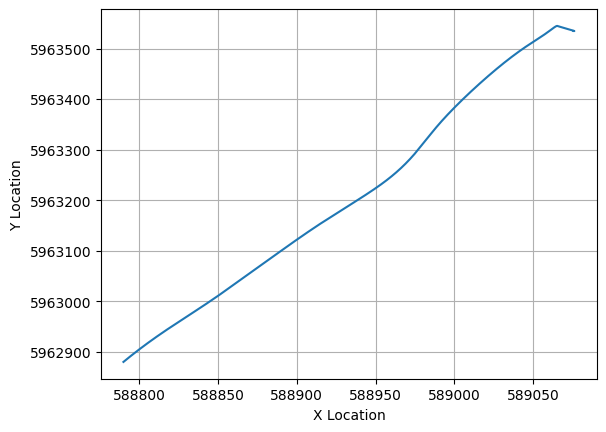

In [30]:
plt.plot(xs, ys)
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.ticklabel_format(style='plain')
plt.grid()

In [31]:
from mpl_toolkits.mplot3d import Axes3D
# Enable 3D Ploting
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

from google.colab import output
output.enable_custom_widget_manager()

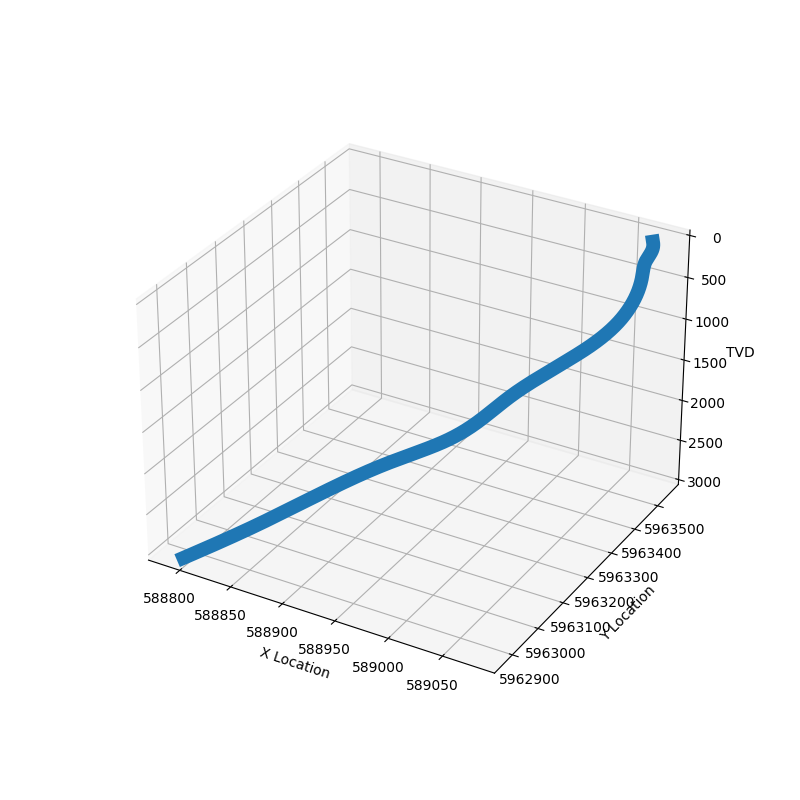

In [55]:
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, lw=10)
ax.set_zlim(3000, 0)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')
plt.show()

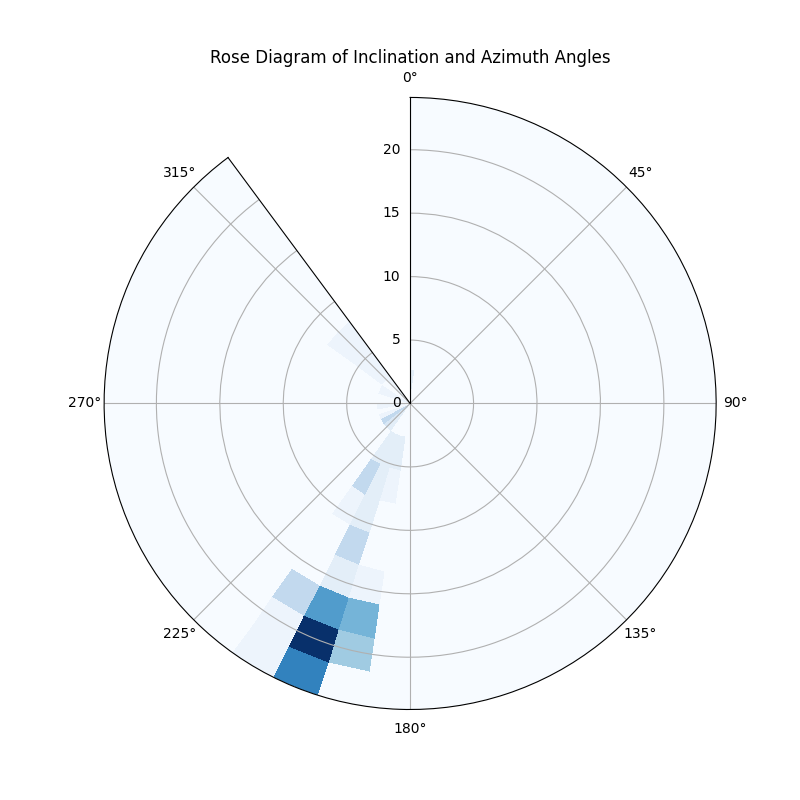

In [33]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Rose Diagram of Inclination and Azimuth Angles')
ax.hist2d(np.radians(survey_subset['AZI']), survey_subset['INC'], bins=[36, 9], cmap=plt.cm.Blues)
plt.show()
